Columns in the dataset are:

age: 
age of primary beneficiary

sex: 
insurance contractor gender -- female / male

bmi: 
Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight  (kg/m2)  using the ratio of height to weight, ideally 18.5 to 24.9

children: 
Number of children covered by health insurance / Number of dependents

smoker: 
Smoking -- yes / no

region: 
the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: 
Individual medical costs billed by health insurance
'charges' column is the target column based on all other features in the list.

Let's import the librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

let's load the dataset into pandas dataframe and output the of the data

In [5]:
df = pd.read_csv('C:/Users/Stevy/Documents/Course-Material/Course_Material/S_10_Linear_Regression/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let's create a new column where we will have 1 for yes and 0 for no.

In [15]:
def map_smoking(column):
    mapped=[]
    
    for value in column:
        
        if value=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
                
    return mapped
df["smoker_norm"]=map_smoking(df["smoker"])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


Let's right a funcrion that returns 1 if bmi > 30 and 0 for all other bmi values

In [19]:
def map_obese(column):
    mapped=[]
    
    for value in column:
        
        if value > 30:
            mapped.append(1)
        else:
            mapped.append(0)
                
    return mapped
df["obese"]=map_obese(df["bmi"])

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


Let's create a column where we'll have 1 for male an 0 for female

In [22]:
def map_sex(column):
    mapped=[]
    
    for value in column:
        
        if value == 'female':
            mapped.append(0)
        else:
            mapped.append(1)
                
    return mapped
df["sex_norm"]=map_sex(df["sex"])

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese,sex_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


Let's display the number of obeservationsin our data and also the basic static of our dataframe

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
age            1338 non-null int64
sex            1338 non-null object
bmi            1338 non-null float64
children       1338 non-null int64
smoker         1338 non-null object
region         1338 non-null object
charges        1338 non-null float64
smoker_norm    1338 non-null int64
obese          1338 non-null int64
sex_norm       1338 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 104.6+ KB


In [25]:
df.describe()

,age,bmi,children,charges,smoker_norm,obese,sex_norm
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,0.526906,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.403694,0.499462,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000


Ouput the list of columns in our data

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_norm', 'obese', 'sex_norm'],
      dtype='object')

## Exploratory Data Analysis

C:\Users\Stevy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


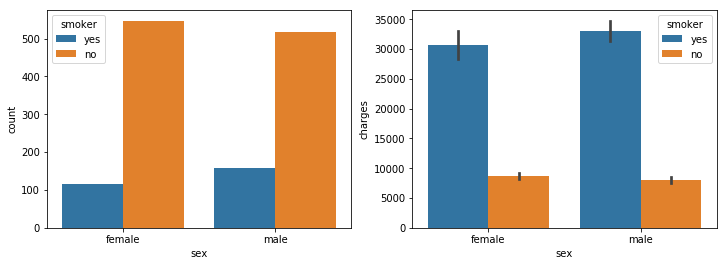

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x='sex',data=df, hue='smoker', ax = axes[0])
sns.barplot(x='sex', y='charges',data=df, hue='smoker', ax = axes[1])
plt.show()

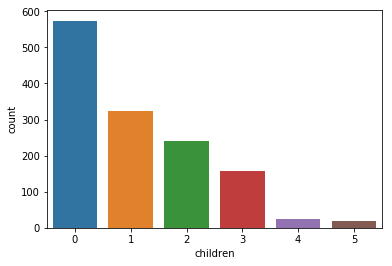

In [34]:
sns.countplot(x = 'children', data = df)
plt.show()

C:\Users\Stevy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


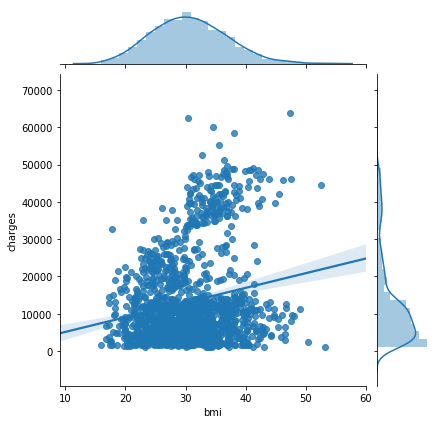

In [36]:
sns.jointplot(x = 'bmi', y = 'charges', data = df, kind = 'reg')
plt.show()

Let's recreate the map for correlation

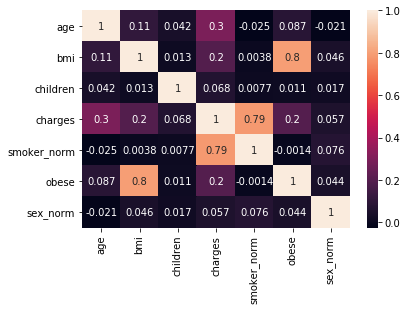

In [39]:
sns.heatmap(df.corr(), annot = True)
plt.show()

## Linear Regression Model Training

Let's separate data into X and y arrays
Will use ['age', 'bmi', 'children','smoker_norm', 'obese'] for X and ['charges'] for y

In [42]:
X = df[['age', 'bmi', 'children','smoker_norm', 'obese']]
y = df['charges']

Let's import train_test_split and split the data into training and test data sets .
We will use test_size=0.33, random_state=101

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

Let's check the head of our X_train

In [45]:
X_train.head()

,age,bmi,children,smoker_norm,obese
612,18,33.155,0,0,1
65,19,28.900,0,0,0
42,41,21.780,1,0,0
533,37,36.190,0,0,1
586,21,20.235,3,0,0


Let's import the linear model

In [46]:
from sklearn import linear_model

Let's create an instance lm standing for linear model

lm = linear_model.LinearRegression()

Let's train the model on X_train and y_train

In [50]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The value of the intercept

In [52]:
lm.intercept_

-6569.1175230230965

The value of the coefficients

In [53]:
lm.coef_

array([  241.39461251,    90.26053022,   537.54489467, 23418.33376791,
        4166.66138097])

Let's create a dataframe using columns from x as index and values of coefficients in a new column 'coefficient'.

In [58]:
coef=pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])

In [59]:
coef

,Coefficient
age,241.394613
bmi,90.260530
children,537.544895
smoker_norm,23418.333768
obese,4166.661381


Our model have never seen X_test, let's provide test data "X_test" to our created model and see what the predictions are. Once we get the predictions from the model, we can compare them with what we have in our y_test.

In [60]:
pred = lm.predict(X_test)

Let's genrate a scatter plot

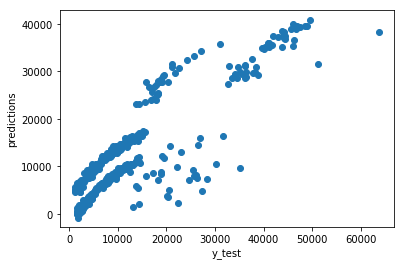

In [63]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

Let's create a residual Histogram

C:\Users\Stevy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


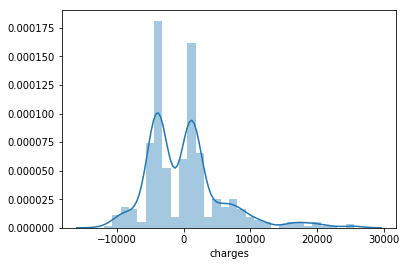

In [65]:
sns.distplot(y_test-pred, bins = 30)
plt.show()

Let's print MAE(Mean Absolute Error), MSE(Mean Square Error), RMSE(Root Mean Square Error)

In [67]:
from sklearn import metrics

In [72]:
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 4244.486518056409
MSE: 33540220.023688897
RMSE: 5791.39189001132


We will only use age, bmi and smoker coefficients in the function

In [73]:
def calculate_insurance(age,obesity,smoking,inter,cof ):
    age_c = cof[0]
    bmi_c = cof[2]
    smoker_c = cof[4]
    return (age_c*age)+(bmi_c*obesity)+(smoker_c*smoking)+inter

We will use age = 50 and the customer is smoker (smoker = 1) for the complete range of BMI.

In [74]:
bmi = [25,30,35,40,45,50,60]
age = 50
smoker = 1
insurance=[]
for value in bmi:
    print('For BMI',value,'Insurance will be:',
          calculate_insurance(age,value,smoker,lm.intercept_,lm.coef_))

For BMI 25 Insurance will be: 23105.896850178753
For BMI 30 Insurance will be: 25793.62132354815
For BMI 35 Insurance will be: 28481.345796917536
For BMI 40 Insurance will be: 31169.07027028693
For BMI 45 Insurance will be: 33856.794743656326
For BMI 50 Insurance will be: 36544.51921702572
For BMI 60 Insurance will be: 41919.96816376451


The End